<a href="https://colab.research.google.com/github/joaoppadua/stj_reconhecimento_de_pessoas/blob/main/Mixed_methods_CUP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###CODE TO THE BOOK "USING MIXED METHODS IN FORENSIC DISCOURSE"

In [ ]:
#Mount drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install git+https://github.com/felipemaiapolo/legalnlp

  Cloning https://github.com/felipemaiapolo/legalnlp to /tmp/pip-req-build-0eocry0n
  Running command git clone -q https://github.com/felipemaiapolo/legalnlp /tmp/pip-req-build-0eocry0n
     |████████████████████████████████| 64 kB 2.8 MB/s 
  Created wheel for legalnlp: filename=legalnlp-1.0.0-py3-none-any.whl size=11653 sha256=7d12c551954d0aea3eb6259fd41314daa6573300015ab260c8f06347a229648a
  Stored in directory: /tmp/pip-ephem-wheel-cache-t1izzr7_/wheels/68/2c/bc/648c46b3bcdc01c929bb289ca6f2c514049437f74835d993f9
  Created wheel for ftfy: filename=ftfy-6.0.3-py3-none-any.whl size=41933 sha256=3a9a19248e39cddc20c143df7d466c5b22924dbaffc36e38ca63a98c302da2d1
  Stored in directory: /root/.cache/pip/wheels/19/f5/38/273eb3b5e76dfd850619312f693716ac4518b498f5ffb6f56d
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=e93b5d1e63622f33bb2ffe28e9b7cc6ce4fd549a916246330aa4aaf489309375
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca

In [ ]:
!pip install empiricaldist

  Created wheel for empiricaldist: filename=empiricaldist-0.6.2-py3-none-any.whl size=10737 sha256=ac220f209c7a0d5b75035e52e9f7f447c3f774325c96de1d833ad49c6bd825e7
  Stored in directory: /root/.cache/pip/wheels/34/22/5f/9ba9db604d08670e283b2e04551dd407f44cf889fdb9617ce5
Successfully built empiricaldist


In [ ]:
#imports 
import nltk
import pandas as pd
from collections import Counter
#from nltk.lm import MLE
from matplotlib import pyplot as plt
from legalnlp import *
import os
from nltk import FreqDist, ConditionalFreqDist

In [ ]:
# Get utils.py (from Prof. Allen Downey)

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    
download('https://github.com/AllenDowney/ThinkBayes2/raw/master/soln/utils.py')

Downloaded utils.py


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Getting and preparing the data: 

In [ ]:
DATA_PATH = 'drive/MyDrive/coding/python/local_repo/stj reconhecimento de pessoas'
DATA_FILE = 'corpus_stj_art_226.txt'

In [ ]:
with open(os.path.join(DATA_PATH, DATA_FILE), 'r', encoding='utf-8') as f:
  data_raw = f.read()

In [ ]:
from legalnlp.clean_functions import clean
data_clean = clean(data_raw)
type(data_clean)

str

In [ ]:
from nltk import RegexpTokenizer
tokens = RegexpTokenizer(r'\w+').tokenize(data_clean)

In [ ]:
tokens[:50]

['agravo',
 'regimental',
 'no',
 'habeas',
 'corpus',
 'processual',
 'penal',
 'roubo',
 'circunstanciado',
 'insurgência',
 'contra',
 'acórdão',
 'transitado',
 'em',
 'julgado',
 'manejo',
 'do',
 'writ',
 'como',
 'revisão',
 'criminal',
 'descabimento',
 'art',
 'numero',
 'inciso',
 'i',
 'alínea',
 'e',
 'da',
 'constituição',
 'federal',
 'ausência',
 'de',
 'manifesta',
 'ilegalidade',
 'insurgência',
 'quanto',
 'à',
 'autoria',
 'delitiva',
 'participação',
 'do',
 'agravante',
 'na',
 'prática',
 'do',
 'crime',
 'reconhecida',
 'pelas',
 'instâncias']

Now let's count the raw data and compare it to the clean data.

In [ ]:
raw_tokens = nltk.word_tokenize(data_raw)
len(raw_tokens), len(tokens)

(22152, 18769)

And lets create a unigram and a bigram generator for the dataset.

In [ ]:
fdist = FreqDist(tokens)
fdist.max(), fdist[fdist.max()], fdist.N(), fdist.freq(fdist.max())

('de', 907, 18769, 0.04832436464382759)

In [ ]:
bgrams = [bgram for bgram in nltk.bigrams(tokens)]
type(bgrams)

list

In [ ]:
cfdist = ConditionalFreqDist(bgrams)
len(cfdist), cfdist['reconhecimento'].max()

(2324, 'pessoal')

In [ ]:
cfdist['reconhecimento'].freq('pessoal')

0.362962962962963

Now, let's create a function to generate a probability distribution for second words, given a prior word in a bigram.

In [ ]:
from empiricaldist import Pmf

def bigram_pmf(cond_freq_dist, prior_word):
  ps_l = []
  qs_l = [w for w in cond_freq_dist[prior_word]]
  for i in qs_l:
    p = cond_freq_dist[prior_word].freq(i)
    ps_l.append(p)
  pmf = Pmf(ps_l, qs_l)
  return pmf



And let's generate a Pmf object, and than sort it in descending order. 

In [ ]:
reconhecimento = bigram_pmf(cfdist, 'reconhecimento')

In [ ]:
reconhecimento.sort_values(ascending=False)[:20]

pessoal        0.362963
fotográfico    0.318519
do             0.125926
de             0.044444
da             0.022222
por            0.022222
fls            0.007407
art            0.007407
foi            0.007407
e              0.007407
ratificado     0.007407
judicial       0.007407
disposições    0.007407
comprovação    0.007407
feito          0.007407
operado        0.007407
não            0.007407
já             0.007407
deu            0.007407
na             0.007407
Name: , dtype: float64

Let's plot this:

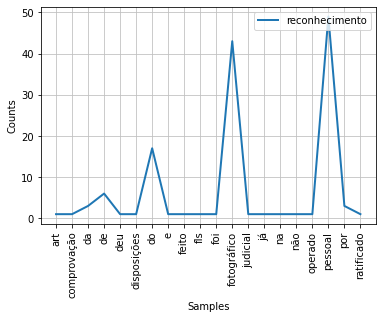

In [ ]:
cfdist.plot(conditions=['reconhecimento'], cumulative=False)

Not only does it seems consistent with [Zipf's Law](https://en.wikipedia.org/wiki/Zipf%27s_law), but it also shows that "reconhecimento" heavily conditions "fotográfico" and "pessoal" as next words, even over formal words, such as variations of possessive determiners derived from "de".


A conditional probaiblity-based N-gram language model uses the adaptation of Bayes' Theorem for word counts, as follows:

\begin{equation}
    P(word_{2}\mid word_{1}) = \frac{C(word_{1}, word_{2})}{C(word_{1})} \tag{1}
  \end{equation}

where $C$ is the count of the word or bigram. In other words, the probability of a second word is calculated by the count of the bigram, normalized by the count of the first word. 

We can compare the bigram distribution of "reconhecimento" in our STJ dataset with the [most common bigrams in the "Corpus do Português"](https://www.ngrams.info/portuguese.asp) compiled by Mark Davies at the Brigham Young University. 

In [ ]:
with open(os.path.join(DATA_PATH, 'port_bigrams_byu.txt'), 'r', encoding='utf-8', errors='ignore') as f:
  raw = f.readlines()

In [ ]:
raw[:10]

['31375\tde\to\t||\tprp\tatd-ms\n',
 '30304\tque\to\t||\tcj\tatd-ms\n',
 '28447\tde\ta\t||\tprp\tatd-fs\n',
 '27777\tcom\ta\t||\tprp\tatd-fs\n',
 '27105\tcom\to\t||\tprp\tatd-ms\n',
 '27000\tde\tum\t||\tprp\tati-ms\n',
 '26976\te\ta\t||\tcj\tatd-fs\n',
 '26755\tque\ta\t||\tcj\tatd-fs\n',
 '26315\tpara\ta\t||\tprp\tatd-fs\n',
 '25882\tpara\to\t||\tprp\tatd-ms\n']

In [ ]:
# Creating a list of tuples with the frequency, word 1 and word 2
bigram_tup_l = []
for line in raw:
  broken = line.split('\t')
  num, w1, w2 = broken[0], broken[1], broken[2]
  bigram_tup_l.append((num, w1, w2))


In [ ]:
bigram_tup_l[:10]

[('31375', 'de', 'o'),
 ('30304', 'que', 'o'),
 ('28447', 'de', 'a'),
 ('27777', 'com', 'a'),
 ('27105', 'com', 'o'),
 ('27000', 'de', 'um'),
 ('26976', 'e', 'a'),
 ('26755', 'que', 'a'),
 ('26315', 'para', 'a'),
 ('25882', 'para', 'o')]

In [ ]:
# Creating a list only of bigrams whose first word is "reconhecimento"
reconhecimento_l = [tup for tup in bigram_tup_l if tup[1] == 'reconhecimento']

In [ ]:
reconhecimento_l

[('169', 'reconhecimento', 'de'),
 ('120', 'reconhecimento', 'do'),
 ('99', 'reconhecimento', 'da'),
 ('38', 'reconhecimento', 'internacional'),
 ('35', 'reconhecimento', 'e'),
 ('33', 'reconhecimento', 'dos')]

In [ ]:
# Summing all occurences
total = 0
for tup in reconhecimento_l:
  total += int(tup[0])

total

494

In [ ]:
# Creating a probability distribution
qs =[]
ps = []
for tup in reconhecimento_l:
  qs.append(tup[2])
  p = int(tup[0]) / total
  ps.append(p)

reconhecimento_pmf = Pmf(ps, qs)

In [ ]:
reconhecimento_pmf

,probs
de,0.342105
do,0.242915
da,0.200405
internacional,0.076923
e,0.070850
dos,0.066802


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


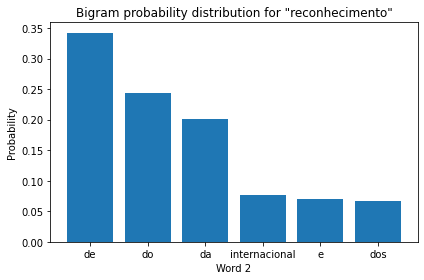

In [ ]:
# Ploting

from utils import decorate

reconhecimento_pmf.bar()

decorate(title='Bigram probability distribution for "reconhecimento"',
         xlabel='Word 2',
         ylabel='Probability')

As we can see, in bigrams sampled out of a reference corpus, the most probable second words are functional words, i.e., prepositions. "Internacional" is the only notional word included in the list. Although this is to be expected somewhat, since this sample is from news sources, not legal sources. However, the predominance of prepositions seem relevant in comparison with our corpus. 

Now, let's construct some a probability distribution of lexical items--i.e., of unigrams, that will help us determine some phenomena later. 

In [ ]:
def unigram_pmf(freq_dist):
  qs_l = [w for w in freq_dist]
  ps_l = [freq_dist.freq(w) for w in freq_dist]
  pmf = Pmf(ps_l, qs_l)
  return pmf

In [ ]:
unigram_dist = unigram_pmf(fdist)

In [ ]:
unigram_dist.sort_values(ascending=False)[:20]

de                0.048324
numero            0.044062
do                0.033033
a                 0.031861
o                 0.022377
da                0.019820
em                0.019394
não               0.018861
que               0.016730
no                0.015984
e                 0.013426
se                0.009377
penal             0.008738
data              0.007779
para              0.007726
na                0.007246
reconhecimento    0.007193
agravo            0.006820
art               0.006180
recurso           0.005541
Name: , dtype: float64

And let's check the count and probability of some key lexical items, that account for the common types of crimes in the Brazilian Criminal Justice System.


In [ ]:
lexical_l = ['roubo', 'homicídio', 'tráfico', 'estupro', 'corrupção', 'sonegação']
lexical_d = {}

for i in lexical_l:
  lexical_d[i] = (fdist[i], fdist.freq(i))


In [ ]:
df_lexical_items = pd.DataFrame(lexical_d, index=['Count', 'Probability'])
df_lexical_items.transpose()

,Count,Probability
roubo,46.0,0.002451
homicídio,6.0,0.000320
tráfico,5.0,0.000266
estupro,4.0,0.000213
corrupção,3.0,0.000160
sonegação,0.0,0.000000


As we can see, "roubo" is the indisputable king of references in the corpus, in what regards names of crimes. "Corrupção", a white collar crime, is about 15 times less frequent in the data. And a prototypical financial crime--tax evasion--doesn't occur at all. 

Now, lets plot this:

In [ ]:
uni_ps = df_lexical_items.loc['Probability']
uni_qs = df_lexical_items.columns
unigram_pmf = Pmf(uni_ps, uni_qs)

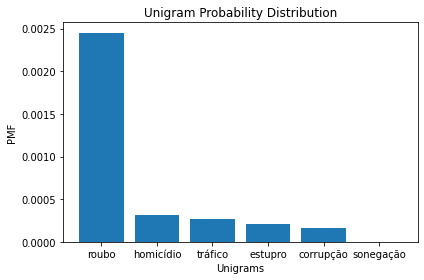

In [ ]:
unigram_pmf.bar()

decorate(title='Unigram Probability Distribution',
         xlabel='Unigrams',
         ylabel='PMF')

And let's do some comparisons. 

In [ ]:
prob_roubo = df_lexical_items.loc['Probability']['roubo']
prob_corrupcao = df_lexical_items.loc['Probability']['corrupção']
prob_homicidio = df_lexical_items.loc['Probability']['homicídio']

In [ ]:
roubo_corrupcao = prob_roubo / prob_corrupcao
roubo_homicido = prob_roubo / prob_homicidio

roubo_corrupcao, roubo_homicido

(15.333333333333336, 7.666666666666668)